In [ ]:
# Analysis/Observation of Data

# Looking at all of our data Capomulin seems to be an effective drug against tumors
# One observation was that the total gender was near 50/50 showing thatt Capomulin is effective in both male and female mice
# Compared to all other drugs provided Capomulin and Ramicane perform at a higher standard than other drugs



In [66]:
# SetUp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study of the data files
mouse_metadata_path = "/Users/pablofortich/Desktop/Module 5 Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/pablofortich/Desktop/Module 5 Challenge/Pymaceuticals/data/Study_results.csv"

# Read mouse data and the study 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined the data into one DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merged_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [53]:

# Code for the duplicate mice ID number and timepoint
duplicate_entries = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate entries based on Mouse ID and Timepoint:")
print(duplicate_entries)

Duplicate entries based on Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801 

In [54]:
# Dropping duplicate entries
cleaned_df = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])

# The code for updated number of unique mice IDs
updated_unique_mice_count = cleaned_df['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice_count}")

Updated number of unique mice IDs: 249


In [37]:

# Code for Drug Regimen and calculation mean, median, variance, std deviation, and SEM
summary_statistics = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Code to display the summary statistics DataFrame
print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


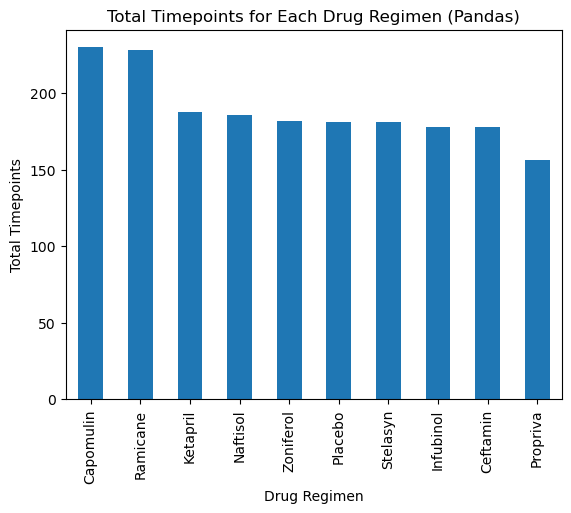

In [55]:
# Code to create Bar Charts and Pie Charts
# Code to create Bar chart using Pandas
bar_chart_pandas = cleaned_df['Drug Regimen'].value_counts().plot(kind='bar', title='Total Timepoints for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.show()

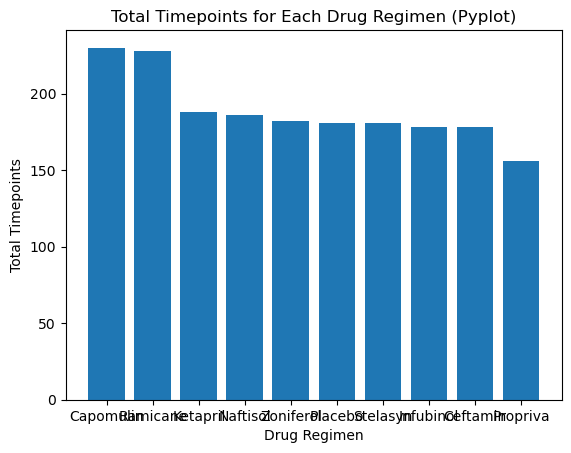

In [56]:
# Code for the Bar chart using Pyplot
plt.bar(cleaned_df['Drug Regimen'].value_counts().index, cleaned_df['Drug Regimen'].value_counts())
plt.title('Total Timepoints for Each Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.show()

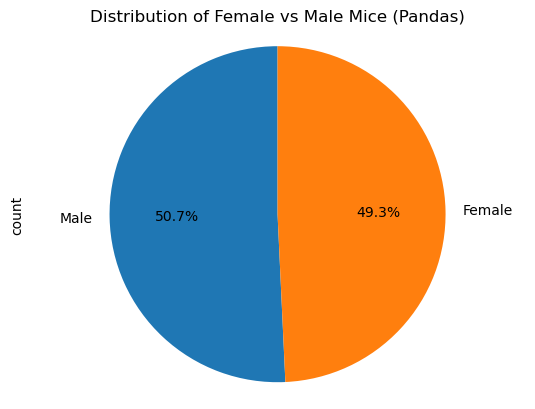

In [40]:
# Code to create Pie chart using Pandas
pie_chart_pandas = cleaned_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution of Female vs Male Mice (Pandas)')
plt.axis('equal') 
plt.show()


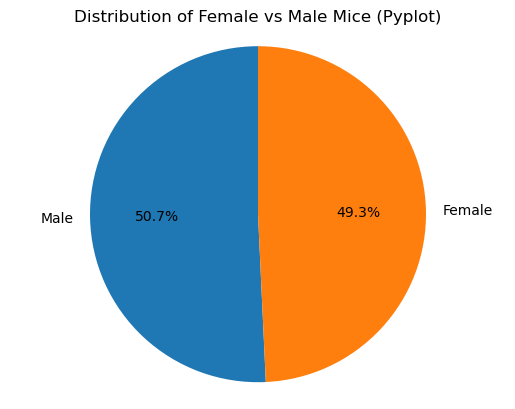

In [57]:
# Code to create Pie chart using Pyplot
plt.pie(cleaned_df['Sex'].value_counts(), labels=cleaned_df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice (Pyplot)')
plt.axis('equal')  
plt.show()

In [58]:

# Code to Group by Mouse ID and to find the last timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Code to merge with the original DF to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'])

# Code to create list of treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Code list to hold tumor volume data
tumor_volume_data = []

# Code to Loop through each drug and append the tumor volume data
for drug in treatment_groups:
    tumor_volume_data.append(final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'])

# Code to calculate quartiles and IQR for every treatment group
for i in range(len(treatment_groups)):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Code to determine possible outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]

    print(f"Treatment Group: {treatment_groups[i]}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")


Treatment Group: Capomulin
IQR: 7.781863460000004
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment Group: Ramicane
IQR: 9.098536719999998
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment Group: Infubinol
IQR: 11.477135160000003
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Treatment Group: Ceftamin
IQR: 15.577752179999997
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


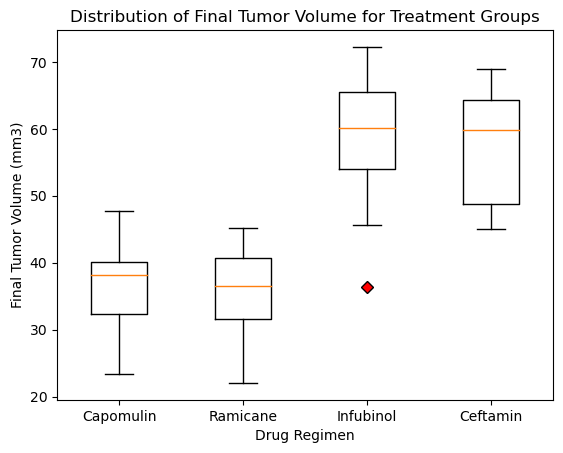

In [59]:
# Code to make Box plot to show the distribution of the final tumor volume for all mice in each treatment group
plt.boxplot(tumor_volume_data, labels=treatment_groups, flierprops=dict(markerfacecolor='r', marker='D'))
plt.title('Distribution of Final Tumor Volume for Treatment Groups')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

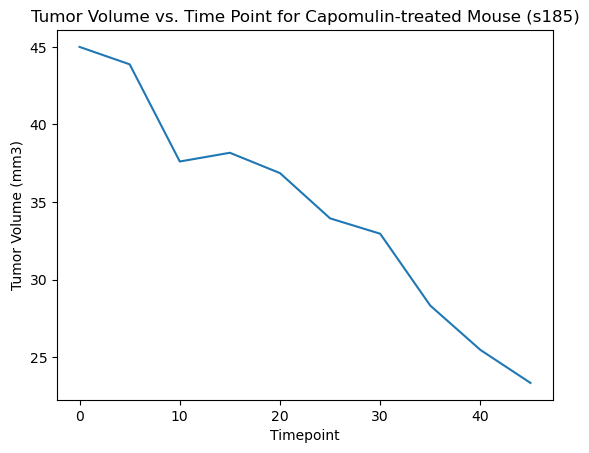

In [61]:

# Selection of a single mouse treated with Capomulin
capomulin_mouse = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 's185')]

#  Code to create Line plot showing tumor volume vs. time point for the selected mouse
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point for Capomulin-treated Mouse (s185)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()




Text(0, 0.5, 'Average Tumor Volume (mm3)')

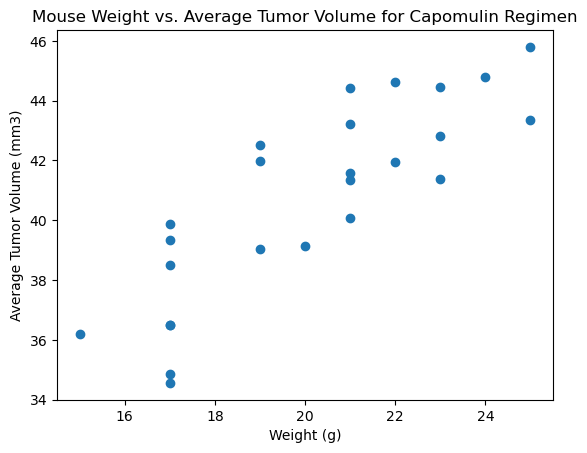

In [62]:
#  Code to create scatter plot with linear regression model
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


In [63]:

# Code to Calculate correlation coefficient and linear regression model
correlation = st.pearsonr(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation[0]}")


Correlation Coefficient: 0.841936342469472


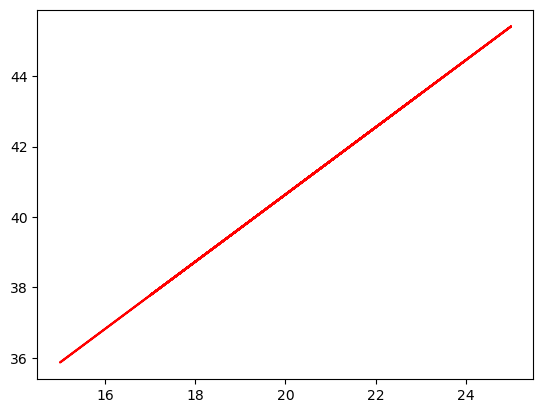

In [65]:
# Code for a Linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
# Code for Scatter plot with linear regression model
plt.plot(capomulin_avg_data['Weight (g)'], slope * capomulin_avg_data['Weight (g)'] + intercept, color='red')
plt.show()
